In [55]:
from modsim import *
%matplotlib notebook

http://www.pveducation.org/pvcdrom/2-properties-sunlight/solar-radiation-space

In [56]:
kg= UNITS.kg
m= UNITS.m
N= UNITS.N
W= UNITS.W
K= UNITS.K
j= UNITS.joules
s= UNITS.seconds
degrees= UNITS.degrees


In [57]:
mass_sun= 1.989e30 
G= 6.673e-11
mass_toast= .05
S_B_const= 5.67e-8
temp_S= 5772 
area_t= .01 
r_s= 695770 *1000 
Pow_s= 3.9e26 
Q_b= .008/273 

power_sun = S_B_const * temp_S *4 *pi *r_s**2 
 

num_G = G* mass_sun *mass_toast   

num_G


 

#I think these are all the equations and constants we need. I found a specific heat for bread that was in kg and C, 
#which I think I converted into Kelvin but it's a bit sketchy. I'm also not sure about the area of the sunward facing 
#toast side, but we can look back at that. 

6.6362985e+18

In [58]:

condition= Condition(x0= 1e100, y0= 0, velocity= 50000, angle = 40, duration= 1e100, T0= 0 )

In [59]:
#I'm not sure I'm doing this right, I'm mostly copying this from chapter 10 with the intro to vectors and the baseball. 

def make_system(condition):
    unpack(condition)
    
    theta = np.deg2rad(angle)
    
    vx, vy = pol2cart(theta, velocity)
    
    init= State(x=x0, y=y0, vx= vx, vy= vy)
    area_toast = area_t 
    
    ts= linspace(0, duration, 1000)
    
    return System(init= init, mass= mass_toast, area_t= area_t, T= T0, Q_b= Q_b, ts= ts)

system= make_system(condition)



In [72]:
def slope_func(state, t, system):
    x, y, vx, vy = state
    
    unpack(system)
    P= Vector(x, y) 
    V= Vector(vx, vy) 
    Tangent_dir= Vector(y, -x)
    tan_dir= Tangent_dir.hat()
    w= V.proj(tan_dir) 
    
    print(w)

    F_grav= G* mass_sun *mass_toast/ P.mag **2 * P.hat() 
    F_cent= w**2  *mass_toast / P.mag  * Tangent_dir.hat()
    
   
    
    a_grav= (F_grav/mass_toast) * P.hat() 
    a_cent= (F_cent/mass_toast) *Tangent_dir.hat() 
    
    
    ax= a_grav[0] + a_cent[0]
    ay= a_grav[1] + a_cent[1]
    
    a= Vector(ax, ay)

    
    
    rad_on_toast= t * Pow_s * r_s**2/ P.mag**2 
    temp_toast= rad_on_toast/ Q_b / mass_toast 
    
    
    return vx, vy, a.x, a.y 
    
    
    
slope_func(system.init,1,system)
    

[    -0.          32139.38048433] dimensionless


(38302.222155948897,
 32139.380484326961,
 <Quantity(1.3272596999999998e-180, 'dimensionless')>,
 <Quantity(1.0329397779163365e-91, 'dimensionless')>)

In [69]:


run_odeint(system, slope_func)

C:\ProgramData\Miniconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [70]:
system.results.head

<bound method NDFrame.head of                            x              y             vx             vy
0.000000e+00   1.000000e+100   0.000000e+00   3.830222e+04   3.213938e+04
1.001001e+97   1.000000e+100   2.042414e-99   3.830222e+04   2.383044e+13
2.002002e+97   1.847472e+108  3.243291e+189  1.080995e+103   8.388870e-62
3.003003e+97    2.534039e+06   2.078552e+69   1.242364e+40   2.527907e+06
4.004004e+97    1.332717e+07   8.844537e+25   1.476352e+83   2.356727e+78
5.005005e+97   1.378209e+170   1.726843e+21   2.655347e+06  4.395838e+112
6.006006e+97    8.337323e+64   1.815042e+07  9.611330e+227   7.229305e+35
7.007007e+97   1.414592e+108  4.533917e+184   1.569432e+11  1.351212e+248
8.008008e+97   2.763736e+180  6.435869e+257   5.673899e-62  1.826484e+238
9.009009e+97    6.563218e+69   4.364327e-61   3.311026e-76   1.071702e-47
1.001001e+98    6.365209e+25   6.349050e+25   4.835628e+98   2.733836e+35
1.101101e+98    6.363291e+25  9.518254e+188   4.615255e+74   6.365053e+25
1.201201

<IPython.core.display.Javascript object>


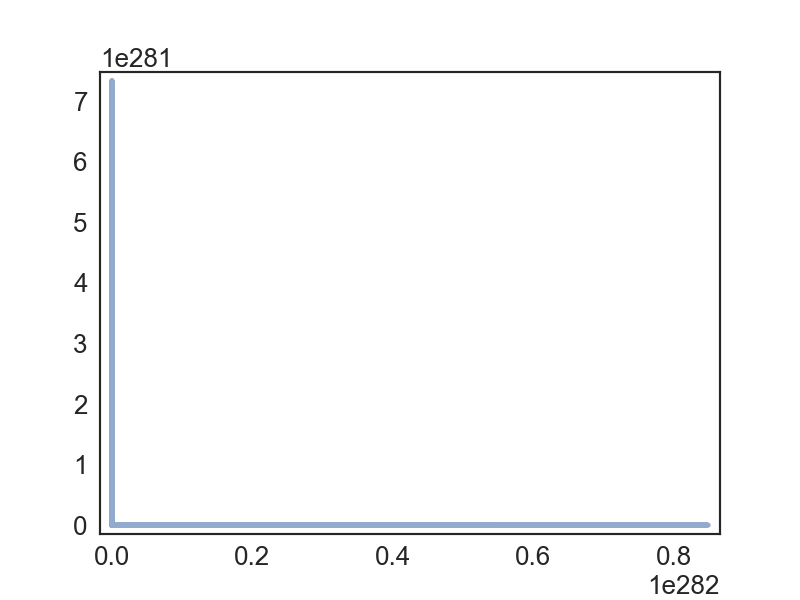

In [71]:
plot(system.results.x, system.results.y)

In [64]:
A= Vector(2, -1) 

B= Vector(0, 5)

A.proj(B)

C= 12*A.hat()



<class 'modsim._Vector'> <class 'modsim._Vector'>


<Quantity([ 0.89442719 -0.4472136 ], 'dimensionless')>